# Geometric and Poisson Distributions

We can use the Bernouli Trials we met in the last chapter to build two other distributions that describe common situations (and also have enough symmetry they are computable).

## Geometric Distributions

This question worked better in Texas than it does in Colorado because of mail in voting, but still:  We are trying to quickly estimate what proportion of voters in Greeley are casting their ballots for candidate A running for mayor of the city. We do this by standing outside a voting location and asking candidates whether they voted for A or B and counting how many people we have to ask before we find our first person voting for A. Say for example that the 4th person we ask says they are voting for candidate A.

Let's see if we can use that number to estimate what proportion of the population p is voting for A. 

Assuming that our sample is random (and note that's the problem with Colorado voting) we could think of each time we ask a voter leaving the polling location who they voted for as a Bernouli trial with a probability of success p (granted we don't know p, but that's why we study math!).

So the question becomes:  If Y is the number of times we had to conduct our Bernouli trial before we got our first success, what is $P(Y=4)$?  Note that in order for trial 4 to be our first success 4 things had to happen - we had to have 3 trials in succession that were failures, each with a probability of 1-p; and then we had to have one trial that was a success with probability p. Provided that these events are independent then the likliehood of all 4 of them happening is just the product of these 4 factors:

$$ (1-p)^3 p $$

More generally the *geometric distribution* has a probability distribution function given by, for $r\geq 0$:

$$ P(Y=r+1) = (1-p)^{r} p $$



This is fundamentally different from our Binomial Distribution. For the binomial distribution with $n$ trials the largest the random variable could be is $n$. In this case, for our geometric distribution $Y$ is potentially unbounded.  For every $r$ the value of $P(Y=r+1)$ is non-zero (though possibly very small). 

It's helpful to fix a $p$ and plot the probabilities of $Y=r+1$ for the first few r.  The thing to notice in the plot is that in order for the random variable to have a chance of getting large, p needs to be small so that there is a large probability of the failures in the trial stacking up. Depending on the value of p you put in, you may need to extend the values r is using by adjusting the 25.

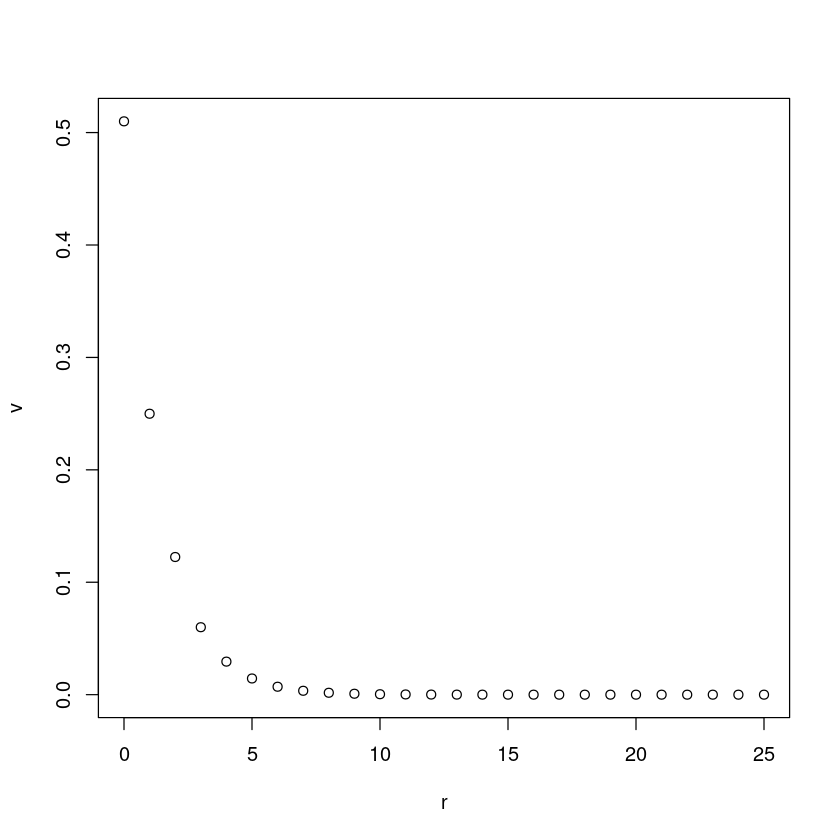

In [1]:
p <- 0.51
r <- c(0:25)
v <- (1-p)^(r) * p
plot(r, v)

So for example:  If candidate A has 0.51 of the population supporting them, the probability that we needed to ask 4 voters before we found the first one voting for candidate A is:

In [2]:
p <- 0.51
(1-p)^3 * p

[1] 0.06000099

Meaning if we did this experiment at 100 polling sites or 100 different times, 6 of those times we would expect to wait until the 4th voter. But wait there is more. 

What we really care about is the complement of the cummulative distribution:  What is the probability that we had to wait until the 4th or **LATER** voter to find the first vote for A. This is a better way to ask because we are really asking how likely is it that candidate A with 0.51 of the vote, is doing this badly OR worse in the voters we have talked to. Note that the complement of this event is:  What is the probability that we found the first voter for A in 0, 1, 2, or 3 voters questioned?  We can than subtract that number from 1 to answer the question above.

In [3]:
c <- (1-0.51)^0 * 0.51 + (1-0.51)^1 * 0.51 + (1-0.51)^2 * 0.51
c

[1] 0.882351

R has a cumulative distribution for the geometric distribution coded in *pgeom* (note that there is an annoying thing in R where its definition of the geometric distribution is off by 1 from others):

In [4]:
pgeom(2, 0.51)

[1] 0.882351

and then subtracking this from 1 we get:

In [5]:
1 - pgeom(2, 0.51)

[1] 0.117649

Meaning that even for a candidate with 0.51 of the vote, we are not overly surprised when we have to talk to 4 voters before we find a supporter. 

It is interesting to ask, how does this probability change as p changes:

Warning message in pgeom(2, p):
“NaNs produced”


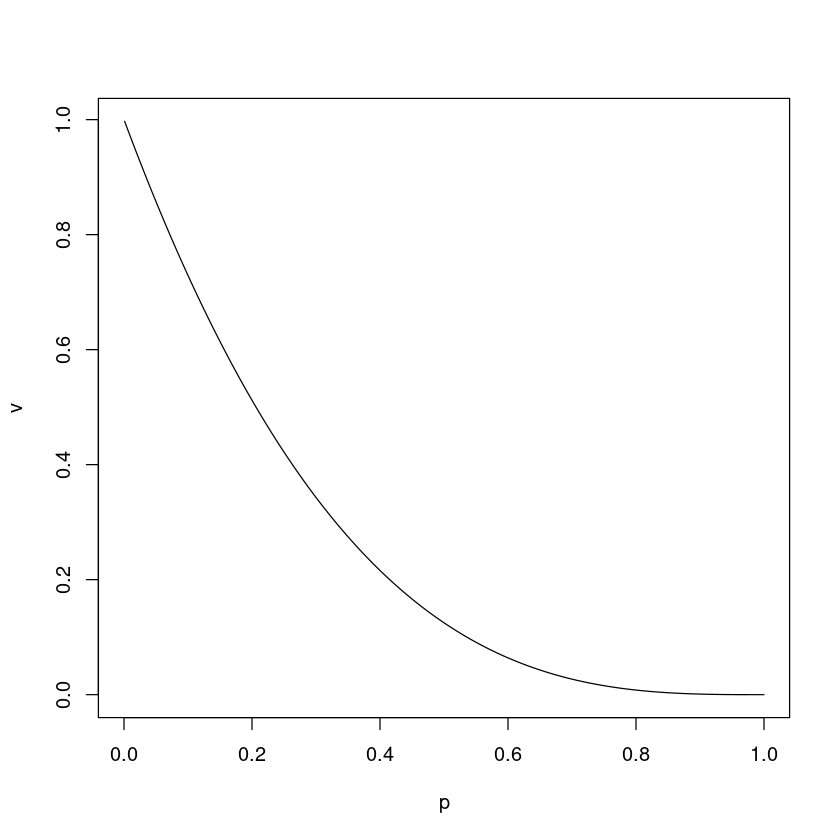

In [6]:
p <- c(0:1000)/1000
v <- 1 - pgeom(2, p)
plot(p, v, type="l")
# You can safely ignore the warning if you get it, 

### Expected Value

The expected value can be computed exactly, and in this case we sort of prefer to do it that way as note that the one thing computers are not great at is infinite sums and infinite integrals. However the values of the distribution decay exponentially and so we actually do expect sums over the distribution to converge quickly. So we can find the approximate expected value by computing 

$$ \sum_{r=0}^N (r+1) p(r) $$ 

for a medium to large value of $N$. 

In [7]:
N <- 100
r <- c(0:N)
p <- 0.51
sum( (r+1)*(1-p)^r * p )

[1] 1.960784

Can you make a prediction about the exact value?

#### Exact Value

To compute the exact value of the sum, we just do it, using our one trick for adding up infinite sums - *write it in terms of a geometric series*.

$$ E(Y) = \sum_{r=0}^\infty (r+1) q^r p = p \frac{d}{dq} \sum_{r=0}^\infty q^{r+1} $$

The sum is now a geometric series and we have a formula for its result:

$$ E(Y) = p \frac{d}{dq} \left[ \frac{q}{1-q} \right] = \mbox{algebra/calculus or calcugebra} = \frac{1}{p} $$

### Variance 

The approximate variance can be found using the formula $\sigma^2 = V(Y) = E(Y^2) - \mu^2$ with $\mu = E(Y)$.  For example:

In [8]:
N <- 100
r <- c(0:N)
p <- 0.51
sum( (r+1)^2 * (1-p)^r * p )  - 1/p^2

[1] 1.883891

#### Exact Value

To compute the exact value of the sum:

$$ \sigma^2 = V(Y) = E(Y^2) - \frac{1}{p^2} = E(Y (Y+1) ) - \frac{1}{p} - \frac{1}{p^2} $$

So we look for:

$$ E(Y (Y+1) ) = \sum_{r=0}^\infty (r+1) (r+2) q^r p = p \frac{d^2}{dq^2} \sum_{r=0}^\infty q^{r+2} = p \frac{d^2}{dq^2} \frac{q^2}{1-q} $$

Some Calculus and Algebra later:

$$ E(Y(Y+1)) = \frac{2}{p^2} $$

Putting it all together:

$$ V(Y) = \frac{2}{p^2} - \frac{1}{p} - \frac{1}{p^2} = \frac{1-p}{p^2} $$

## Poisson Distributions

Consider a particular intersection. We are interested in understanding the number of accidents that will happen at this intersection in a week. One way to think about this is to consider that if we break our units of time down to a small enough amount of time that only one accident can happen at a time - say we consider individual minutes. Now that only one accident is possible we could consider $p$ the probability that an accident occurs in any given minute at this intersection:

$$ P( \mbox{an accident occurs in a minute}) = p$$

$$ P( \mbox{no accident occurs in a minute}) = 1- p $$

$$ P( \mbox{more than one accident occurs in a minute}) = 0 $$

We then take smaller and smaller units of time.  

Our implicit assumption here is each subunit of time is an identically distributed independent Bernouli trial. This is probably a shaky assumption, but lets proceed and see what happens. 

So for a subunit with $n$ occurences in a week we have:

$$ P(Y = r) \sim \binom{n}{r} p^r (1-p)^{n - r} $$

We now want to take a limit as $n\to \infty$, i.e. as the size of the subunits of time become smaller and smaller. Of course in doing this the probability $p$ will change. Let's assume that it just scales linearly:  i.e. the probability of an accident in a given minute is 60 times the probability of an accident in a given second. This is a reasonable assumption if:  

- Everything for a given subunit size is IID; and 
- the subunits are small enough that only one accident can happen at a time.

Let $p = n \lambda$ for some parameter $\lambda$ and then we take the limit of $P(Y=r)$ above:

$$ P(Y=r) = \lim_{n\to \infty} \binom{n}{r} \left( \frac{\lambda}{n} \right)^r \left( 1 - \frac{\lambda}{n} \right)^{n-r} $$

We expand out the binomial coefficient:

$$ = \lim_{n\to \infty} \frac{n (n-1) \cdots (n-r+1)}{r!} \left( \frac{\lambda}{n} \right)^r \left( 1 - \frac{\lambda}{n} \right)^{n-r} $$

factor the $\lambda/n$ and $1- \lambda/n$ terms apart and recombine:


$$ = \lim_{n\to \infty} \frac{\lambda^r}{r!} \left(1 - \frac{\lambda}{n} \right)^n \cdot \frac{ n (n-1) \cdots (n-r+1)}{n^r} \left(1 - \frac{\lambda}{n}\right)^{-r} $$

expand the numerator of the fraction and factor out the parts not depending on $n$:

$$ = \frac{\lambda^r}{r!} \lim_{n\to \infty} \left(1 - \frac{\lambda}{n}\right)^n \left(1 - \frac{\lambda}{n}\right)^{-r} \left(1 - \frac{1}{n}\right) \left( 1 - \frac{2}{n} \right) \cdots \left( 1- \frac{r-1}{n} \right) $$

Now inside the limit, all but the first factor only depends on $n$ inside of the parenthesis; each of this is going to 1. We also recall that 

$$ \lim_{n\to \infty} \left(1 - \frac{\lambda}{n}\right)^n = e^{-\lambda} $$

and putting it all back together we have:

$$ P(Y=r) = \frac{\lambda^r}{r!} e^{-\lambda} $$

### What have we learned?

So we now have a definition:  A random variable $Y$ is called a Poisson Process if it is coming from a trial that has the following property **$Y$ is the number of events happening in a unit of time, distance, area, volume or any thing which can be subdivide into smaller and smaller pieces which has the propeerty that for small enough subdivisions the events can only happen once and the likliehood that they happen becomes an identical independent Bernoulie trial.** Interestingly, small deviations from this assumption will still yield a good approximation. 

The probability distribution of a Poisson Process satisfies the probability distribution for $r \geq 0$:

$$P(Y=r) = \frac{\lambda^r}{r!} e^{-\lambda} $$ 

with some parameter $\lambda > 0$.

#### Plotting the Distribution

This distribution is coded in R as *dpois*, lets plot the distribution for the first few $r$ with a given $\lambda$:

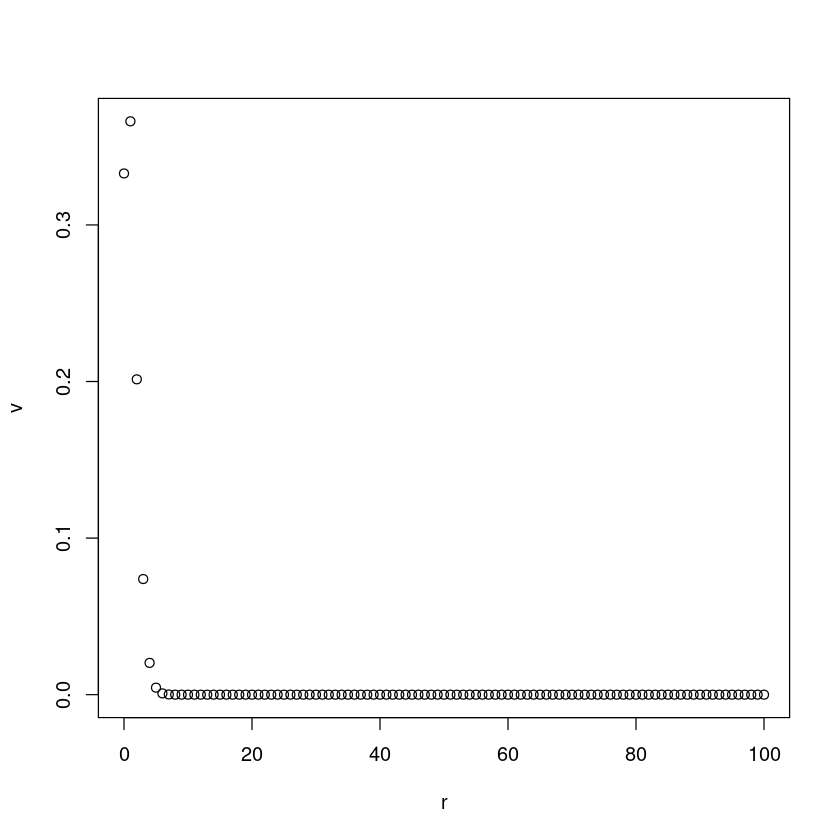

In [9]:
lambda <- 1.1
r <- c(0:100)
v <- dpois(r, lambda)
plot(r, v)

What is the effect of increasing $\lambda$?  Decreasing $\lambda$?

#### Cummulative Distribution

The cumulative distribution, the probability that $Y \leq r$, can be plotted, it is coded in R as *ppois*:

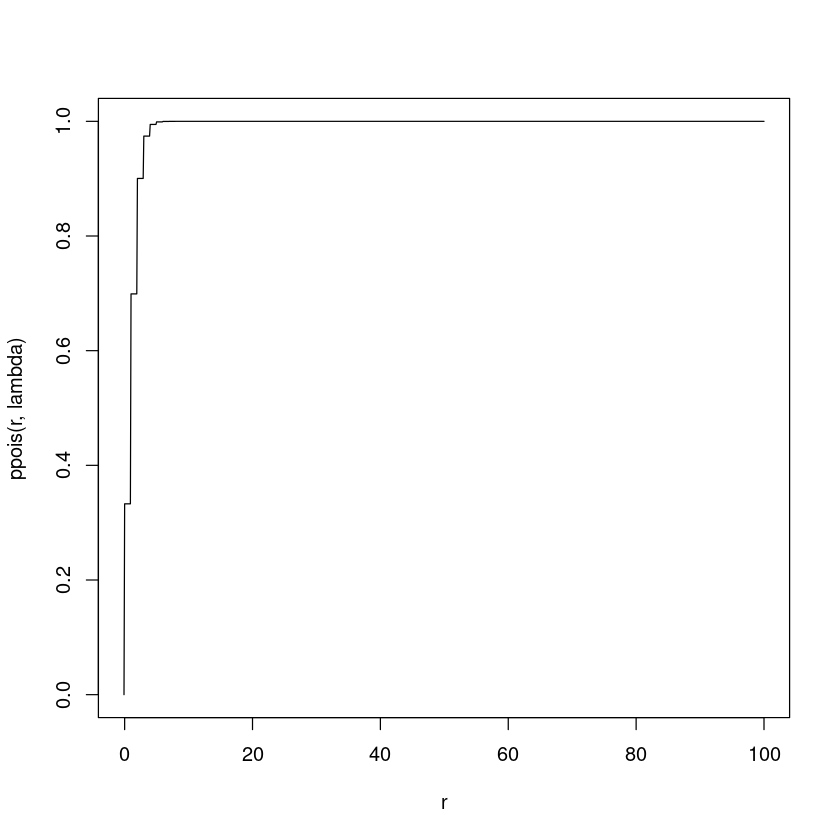

In [10]:
lambda <- 1.1
n <- 100 # The upper bound on n for our plot
r <- c(-1:(10*n))/10
plot(r, ppois(r, lambda), type="l")

Again what is the effect of changing $\lambda$?  Make a prediction before you draw the graph. Again you may have to increase the fineness of our mesh in order for the graph to render correctly. 


### Expected Value

So let's suppose we have found that $\lambda = 1.1$ for our intersection (we will return to finding $\lambda$ from data later). How many accidents do we expect to see each week?  I.e. over the long term if we take the mean of the number of accidents what will we find?

Using R we can approximate it:

In [11]:
r <- c(0:100)
lambda <- 1.1
sum( r*dpois(r, lambda) )

[1] 1.1

Which seems well.... **clearly we should be able to show that this will always happen!**

$$ E(Y) = \sum_{r =0}^\infty r P(Y=r) = \sum_{r=0}^\infty r \frac{\lambda^r}{r!} e^{-\lambda} $$

Again I will note here that the distributions for which we have names are the ones for which the mathematical structure tends to give us formulas with which we can actually do something.  We will talk as the course goes on about why this works, and what we can do more generally.

Continuing:

$$ E(Y) = e^{-\lambda} \sum_{r=1}^\infty \frac{\lambda^r}{(r-1)!} $$

$$ = \lambda e^{-\lambda} \sum_{s=0}^\infty \frac{\lambda^s}{s!} = \lambda e^{-\lambda} e^{\lambda} = \lambda$$

So the $\lambda$ parameter for our Poisson Distribution is exactly the expected value of the random variable. 

### Variance of the Poisson Random Variable

We can also compute the variance, using again our shortcut:  $V(Y) = E(Y^2) - \mu^2$ where $\mu = E(Y)$.

In [12]:
r <- c(0:100)
lambda <- 1.1
sum( r^2*dpois(r, lambda) ) - lambda^2

[1] 1.1

**I would forgive you if you are wondering if maybe we just made a mistake!**

As before the trick to use is that $E(Y^2) = E(Y(Y-1)) + E(Y)$

$$ E(Y(Y-1)) = \sum_{r=0}^\infty r (r-1) \frac{\lambda^r}{r!} e^{-\lambda} = e^{-\lambda} \sum_{r=2}^\infty \frac{\lambda}{(r-2)!}  $$

and we find

$$ = \lambda^2 e^{-\lambda} \sum_{s=0}^\infty \frac{\lambda^s}{s!} = \lambda^2 $$

Putting it together we have:

$$ V(Y) = \lambda^2 + \lambda - \lambda^2 = \lambda$$

So in summary a Poisson random variable with parameter $\lambda$ has expected value and variance $\lambda$. 

## Using the Cummulative Distribution

Consider our dangerous intersection that we now know has 1.1 accidents per week. Find an upper bound for the number of accidents we will have 95% of the time. Mean we want to find the smallest $r$ such that $P(Y \leq r) \geq 0.95$. 

The *qpois* function is the inverse Cummulative Distribution Function. It takes a probability $0\leq q \leq 1$ and returns the value $r$ such that $P(Y\leq r) = q$.

In [13]:
qpois(0.95, 1.1)

[1] 3

Note that because the probability is discrete the result is not that the CDF is exactly 0.95 here:

In [14]:
ppois(3, 1.1)

[1] 0.9742582

Meanwhile, the likliehood that we will go a week with 3 or more accidents is $P(Y \geq 3)$:

In [15]:
1 - ppois(2, 1.1)

[1] 0.09958372

For a given value of $\lambda$ we can play variations on these games for any number of combinations.



## Moments and Moment Generating Functions

One idea which we will need later in class and we should introduce now is that of finding moments. We have seen that *Expected Value* and *Variance* have uses in characterizing a distribution, and for distributions with sufficient symmetry are things we can compute exactly. In an effort to characeterize distributions more broadly one is then led to consider the question of moments. The $m$'th moment of a distribution is defined to be:

$$ E(Y^m) $$

We then define the *Moment Generating Function* of a random variable to be: 

$$ M(t) = E(e^{t Y} ) $$ 

provided that it exists.

This generates moments in the sense that provided that $t$ is in an open interval where $M(t)$ exists we have:

$$ E(Y^k) = \frac{d^k}{dt^k} M(t) \bigg|_{t=0} $$

Two random variables with moment generating functions that exist and are equal are identical. Meaning that moment generating functions, if they exist, will uniquely characterize a distribution. This is a fact we will use once in this class in a few weeks.

### Moment Generating for a Poisson Distribution

Let's compute the moment generating function of the Poisson Distribution:

$$ M(t) = \sum_{r=0}^\infty e^{t r - \lambda} \frac{\lambda^r}{r!} = e^{-\lambda} \sum_{r=0}^\infty \frac{\left( \lambda e^{t} \right)^r}{r!} = e^{\lambda (e^t - 1)} $$

If you go to the wikipedia page for any of our named distributions you will find their moment generating functions given.

An interesting question we unfortunately do not have time for is what the set of values of $t$ for which $M(t)$ exists tells us about the distribution. 


## What have we skipped?

There are couple of things we have carefully ignored. The main one being:

- While the Geometric and Poisson distributions are examples of how we can have a discrete random variable with infinitely many allowed values but with a distribution we can compute with; one might be wondering how can we work with an infinite discrete random varialbe that is for example uniform:  You are confronted with infinitely many doors, one of which has a car behind it and the rest of them goats. Can you choose one door at random with each door being equally likely that you will choose it?  If you do so, how likely is it that you will find the car rather than a goat?

- For that matter, suppose you want to select a random integer to use when a date asks you "What is your favorite Integer?"  What are the chances you would select 1001?



